In [15]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
from numpy import fft

In [65]:
def display_image(A):
    fig,ax = plt.subplots(figsize=(10,5))
    ax.imshow(A)
    
    
def get_FT_display(F):
    F = fft.fftshift(F)
    m = np.log(np.abs(F)+1).max()
    
    img = np.log(np.abs(F)+1)/(m*255)
    return img    


def convolute(F,H):
    B = np.zeros((H.shape[0],H.shape[1],3))
    
    for i in range(len(F)):
        G = F[i]*H             # convolute for each channel
        f = fft.ifft2(G)       # obtain convoluted plane in the spatail domai
        f = np.abs(f)          # discard complex numbers
        B[:,:,i] = f
    
    return B

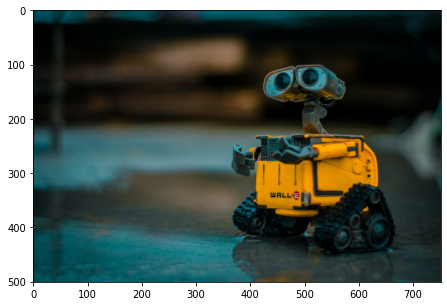

In [4]:
A = io.imread('images/robot.jpeg')

display_image(A)


#### Compute Ideal, Gaussian and Butterworth lowpass filters

Text(0.5, 1.0, 'FT of BUTTERWORTH Kernel')

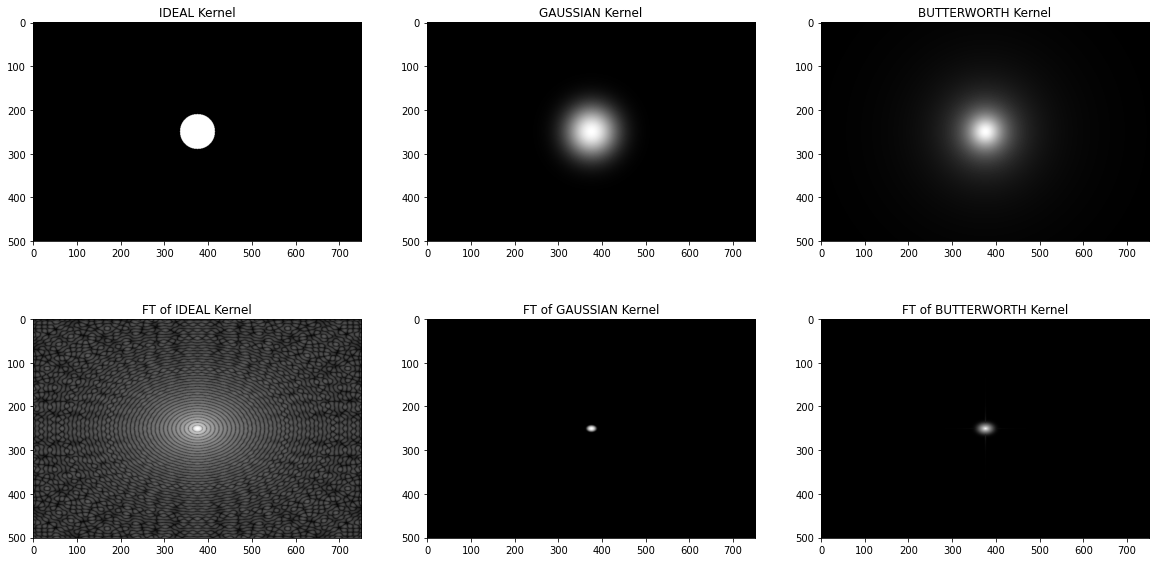

In [78]:
N,M = A.shape[0], A.shape[1]

kernel_a = np.zeros((N,M))
kernel_b = np.zeros((N,M))
kernel_c = np.zeros((N,M))

x,y = int(N/2), int(M/2)                                 # center

do = 40                                                  # cutoff frequency 
n = 1                                                    # order of BUTTERWORTH

for i in range(N):
    for j in range(M):
        distance = np.sqrt((x-i)**2 + (y-j)**2)           # distance from the center
        
        if (distance <= do):                              # IDEAL 
            kernel_a[i,j] = 1
            
        kernel_b[i,j] = np.exp(-(distance**2)/(2*do**2))  # GAUSSIAN 
        
        kernel_c[i,j] = 1/(1 + (distance/do)**(2*n))      # BUTTERWORTH 
        

# Take Fourier Transform of each filter
H1 = fft.fft2(kernel_a)
H2 = fft.fft2(kernel_b)
H3 = fft.fft2(kernel_c)

H1_disp = get_FT_display(H1)
H2_disp = get_FT_display(H2)
H3_disp = get_FT_display(H3)


fig,ax = plt.subplots(2,3,figsize=(20,10))
ax[0,0].imshow(kernel_a, 'gray')
ax[0,0].set_title("IDEAL Kernel")
ax[0,1].imshow(kernel_b, 'gray')
ax[0,1].set_title("GAUSSIAN Kernel")
ax[0,2].imshow(kernel_c, 'gray')
ax[0,2].set_title("BUTTERWORTH Kernel")
ax[1,0].imshow(H1_disp, 'gray')
ax[1,0].set_title("FT of IDEAL Kernel")
ax[1,1].imshow(H2_disp, 'gray')
ax[1,1].set_title("FT of GAUSSIAN Kernel")
ax[1,2].imshow(H3_disp, 'gray')
ax[1,2].set_title("FT of BUTTERWORTH Kernel")

#### Convolute in the Fourier Domain

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'BUTTERWORTH')

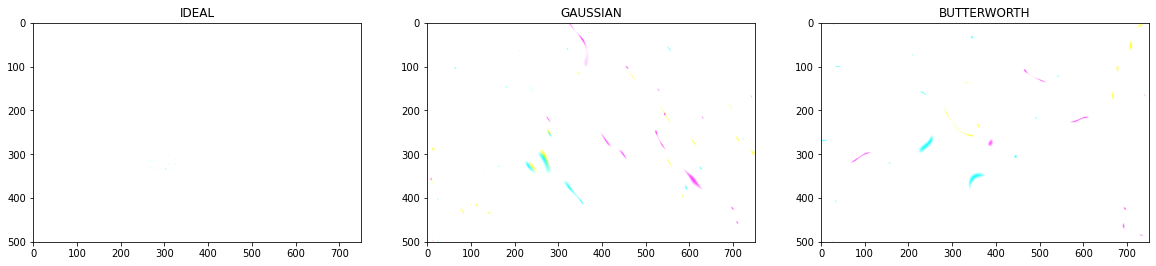

In [81]:
red_channel   = A[:,:,0]
green_channel = A[:,:,1]
blue_channel  = A[:,:,2]

F1 = fft.fft2(red_channel)
F2 = fft.fft2(green_channel)
F3 = fft.fft2(blue_channel)

# IDEAL CONVOLUTION
F = [fft.fftshift(F1), fft.fftshift(F2), fft.fftshift(F3)]

A1 = convolute(F,H1)
A2 = convolute(F,H2)
A3 = convolute(F,H3)

A1 = A1.astype()

fig,ax = plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(A1)
ax[0].set_title("IDEAL")
ax[1].imshow(A2)
ax[1].set_title("GAUSSIAN")
ax[2].imshow(A3)
ax[2].set_title("BUTTERWORTH")

In [80]:
A1

array([[[1284.64368891, 1583.20013072, 1479.97008506],
        [1333.88170145, 1615.13101569, 1458.94413399],
        [1223.57368272, 1476.01622199, 1306.22976492],
        ...,
        [1094.6731551 , 1503.96829228, 1438.30691734],
        [1120.06463376, 1487.5588634 , 1439.19751812],
        [1280.77401827, 1667.96935504, 1541.38887606]],

       [[1253.10759957, 1638.07408215, 1504.97916513],
        [1184.37608862, 1482.34752074, 1376.47694731],
        [1174.74717648, 1454.80436524, 1288.0866366 ],
        ...,
        [1047.36568878, 1365.09234992, 1325.15173142],
        [1163.91290078, 1569.21704097, 1462.00395189],
        [1189.30669747, 1545.80534064, 1478.53766005]],

       [[1132.3828771 , 1454.04358221, 1385.47903634],
        [1226.22374874, 1556.82922947, 1439.13993468],
        [1222.7999634 , 1482.99396746, 1385.11718622],
        ...,
        [1130.6366903 , 1444.22828038, 1330.06817086],
        [1133.60010582, 1426.12860031, 1396.4316014 ],
        [1148.09946041

In [60]:
t = A.shape 
t = t + (1,)
t

(501, 751, 3, 1)